## **CNN CON DATASET MNIST**

#### **- Cargando el conjunto de datos**

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
x_train.min()

0

In [3]:
x_train.max()

255

#### **- Acondicionando el conjunto de datos**

In [4]:
# Preprocesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

# PREPROCESAMEINTO DE DATOS
x_train, x_te = x_train / 255.0, x_test / 255.0 # Cambio al rango [0,1]

# Dejamos las etiquetas en formato decimal, no convertimos a one hot encoding
#y_train = to_categorical(y_train, num_classes=10) # One-hot encoding para minimizar error
#y_te = to_categorical(y_test, num_classes=10)
print(y_train[0])

5


In [5]:
# PARTICIÓN DE LOS DATOS
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia

In [6]:
# Expandir dimensiones para ajustar el input a una CNN
print(x_tr.shape)
x_tr = expand_dims(x_tr, axis=3)
x_val = expand_dims(x_val, axis=3)
x_te = expand_dims(x_te, axis=3)
print(x_tr.shape)

(54000, 28, 28)
(54000, 28, 28, 1)


Hay los mismos datos, pero está explotada una dimensión más 

#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [7]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers #importamos el modulo entero

# API secuencial
convnet = Sequential()

# BASE MODEL
convnet.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64,activation='relu'))
convnet.add(layers.Dense(10,activation='softmax'))

In [8]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
convnet.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               # loss='categorical_crossentropy', # Si las etiquetas están en one-hot encoded
               metrics=['accuracy'])

In [10]:
H = convnet.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5


422/422 [==============================] - 5s 10ms/step - loss: 0.2745 - accuracy: 0.9182 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 2/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0658 - accuracy: 0.9795 - val_loss: 0.0546 - val_accuracy: 0.9850
Epoch 3/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0507 - val_accuracy: 0.9847
Epoch 4/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0435 - val_accuracy: 0.9880


#### **- Observando el proceso de entrenamiento para tomar decisiones**

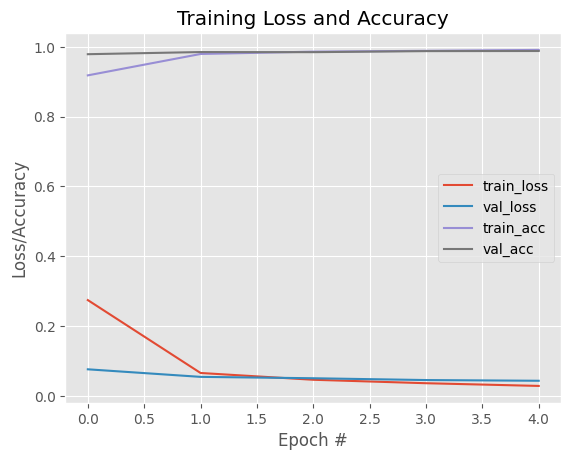

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Se ve que no hay overfitting

#### **- Sacando las predicciones en el subset de test y evaluando la performance del modelo**

In [12]:
from sklearn.metrics import classification_report

# Evaluando el modelo de predicción con las imágenes de test
predictions = convnet.predict(x_te, batch_size=128)
print(classification_report(y_test, predictions.argmax(axis=1)))

79/79 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

